# Лабораторная работа №2 Белоцкий Дмитрий

# Задание 1.

In [3]:
#Метод Гаусса
import numpy as np


def gauss_method(A, f, n):
    # прямой ход
    for i in range(0, n):
        if A[i][i] != 0:
            temp = A[i][i]
            for j in range(i, n):
                A[i][j] /= temp
            f[i] /= temp
            for I in range(i+1, n):
                temp = A[I][i]
                for j in range(i, n):
                    A[I][j] -= A[i][j]*temp
                f[I] -= f[i]*temp
    # обратный ход
    x = np.array(f)
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):
            x[i] -= A[i][j]*x[j]
    print("A:\n"+str(A))
    print("f:  "+str(f))
    return x


if __name__ == '__main__':
    A = np.array([[2.979, 0.427, 0.406, 0.348],
                 [0.273, 3.951, 0.217, 0.327],
                 [0.318, 0.197, 2.875, 0.166],
                 [0.219, 0.231, 0.187, 3.276]])
    f = np.array([0.341, 0.844, 0.131, 0.381])
    n = 4
    x = gauss_method(A, f, n)
    '''
    print("Результат прямого хода метода Гаусса: ")
    for i in range(n):
        for j in A[i]:
            print("%.8f" % (j), end = " ")
        print('|', float('{:.8f}'.format(f[i])))
    print("Решение системы: ", x)
    '''
    print("X  " + str(x))

A:
[[1.         0.14333669 0.13628734 0.11681772]
 [0.         1.         0.04596104 0.07543932]
 [0.         0.         1.         0.04157219]
 [0.         0.         0.         1.        ]]
f:  [0.11446794 0.2077652  0.02235267 0.09635553]
X  [0.07209386 0.19965296 0.01834696 0.09635553]


In [2]:
#Метод Гаусса-Жордана
import numpy as np


def gauss_jordan_method(A, f, n):
    # прямой ход
    for i in range(0, n):
        if A[i][i] != 0:
            temp = A[i][i]
            for j in range(i, n):
                A[i][j] /= temp
            f[i] /= temp
            for I in range(i+1, n):
                temp = A[I][i]
                for j in range(i, n):
                    A[I][j] -= A[i][j]*temp
                f[I] -= f[i]*temp
    # обратный ход
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):
            f[i] -= A[i][j]*f[j]
            A[i][j] = 0
    print(A)
    print(f)


if __name__ == '__main__':
    A = np.array([[2.979, 0.427, 0.406, 0.348],
                 [0.273, 3.951, 0.217, 0.327],
                 [0.318, 0.197, 2.875, 0.166],
                 [0.219, 0.231, 0.187, 3.276]])
    f = np.array([0.341, 0.844, 0.131, 0.381])
    n = 4
    gauss_jordan_method(A, f, n)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[0.07209386 0.19965296 0.01834696 0.09635553]


In [8]:
#метод Якоби
import numpy as np


def jacobi_method(A, f, n):
    A_1 = np.zeros((n, n))
    A_2 = np.zeros((n, n))
    D = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i - j > 0:
                A_1[i][j] = A[i][j]
            elif i - j < 0:
                A_2[i][j] = A[i][j]
            else:
                D[i][j] = A[i][j]
    x = np.ones(n)
    e = 1
    iterations = 0
    while e > 1e-3:
        x_next = -np.dot(np.dot(np.linalg.inv(D), A_1), x) - np.dot(np.dot(np.linalg.inv(D), A_2), x) + np.dot(np.linalg.inv(D), f)
        e = np.sqrt(np.abs(np.sum(x_next-x)))
        x = x_next
        iterations += 1
    return x, iterations


if __name__ == '__main__':
    A = np.array([[2.979, 0.427, 0.406, 0.348],
                 [0.273, 3.951, 0.217, 0.327],
                 [0.318, 0.197, 2.875, 0.166],
                 [0.219, 0.231, 0.187, 3.276]])
    f = np.array([0.341, 0.844, 0.131, 0.381])
    n = 4
    x, iterations = jacobi_method(A, f, n)
    print(x)
    print(str(iterations) +  ' iterations')

[0.07209383 0.19965294 0.01834694 0.09635552]
13 iterations


In [7]:
#метод Зейделя
import numpy as np


def zeidel_method(A, f, n):
    A_1 = np.zeros((n, n))
    A_2 = np.zeros((n, n))
    D = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i - j > 0:
                A_1[i][j] = A[i][j]
            elif i - j < 0:
                A_2[i][j] = A[i][j]
            else:
                D[i][j] = A[i][j]
    x = np.ones(n)
    e = 1
    iterations = 0
    while e > 1e-3:
        x_next = np.dot(np.linalg.inv(D + A_1), f - np.dot(A_2, x))
        e = np.sqrt(np.abs(np.sum(x_next-x)))
        x = x_next
        iterations += 1
    return x, iterations


if __name__ == '__main__':
    A = np.array([[2.979, 0.427, 0.406, 0.348],
                 [0.273, 3.951, 0.217, 0.327],
                 [0.318, 0.197, 2.875, 0.166],
                 [0.219, 0.231, 0.187, 3.276]])
    f = np.array([0.341, 0.844, 0.131, 0.381])
    n = 4
    x, iterations = zeidel_method(A, f, n)
    print(x)
    print(str(iterations) +  ' iterations')

[0.07209386 0.19965296 0.01834696 0.09635553]
7 iterations


# Задание 2


In [39]:
#метод сопряженных градиентов
import numpy as np


def pos(A, n):
    for N in range(n+1):
        minor = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                minor[i][j] = A[i][j]
        if np.linalg.det(minor) < 0:
            return False
    return True


def conjugate_gradient_method(A, b, n):
    x = np.ones(n)
    r = b - np.dot(A, x)
    z = r
    iterations = 0
    while np.linalg.norm(r)/np.linalg.norm(b) > 1e-6:
        alpha = np.dot(r, r) / np.dot(np.dot(A, z), z)
        x += np.dot(alpha, z)
        r_next = r - np.dot(alpha, np.dot(A, z))
        beta = np.dot(r_next, r_next) / np.dot(r, r)
        z = r_next + np.dot(beta, z)
        r = r_next
        iterations += 1
    return x, iterations


if __name__ == '__main__':
    A = np.array([[2.979, 0.427, 0.406, 0.348],
                 [0.273, 3.951, 0.217, 0.327],
                 [0.318, 0.197, 2.875, 0.166],
                 [0.219, 0.231, 0.187, 3.276]])
    b = np.array([0.341, 0.844, 0.131, 0.381])
    n = 4
    if pos(A,n):
        print('Положительно определенная матрица')
    else: print('Отрицательно определенная матрица')
    x, iterations = conjugate_gradient_method(A, b, n)
    print(x)
    print(str(iterations) +  ' iterations')
    
    
    print('Число обусловленности исходной матрицы: '+ str(np.linalg.cond(A)))
    M = np.zeros((n, n))
    for i in range(n):
        M[i][i] = 1/np.max(A[i])
    A = np.dot(M, A)
    b = np.dot(M, b)
    print('Число обусловленности для переобусловленной матрицы: ' + str(np.linalg.cond(A)))
    x, iterations = conjugate_gradient_method(A, b, n)
    print(x)
    print(str(iterations) +  ' iterations')

Положительно определенная матрица
[0.07209377 0.19965293 0.01834683 0.09635554]
8 iterations
Число обусловленности исходной матрицы: 1.6838209317100825
Число обусловленности для переобусловленной матрицы: 1.4632234839281588
[0.07209388 0.19965299 0.01834692 0.09635552]
9 iterations


Вывод: если число обусловленности матрицы оказывается слишком большим (> 3), то метод сопряженных градиентов может
    сходиться медленно, тогда нужно уменьшить число обусловленности матрицы, домножив на определенную матрицу(слева/справа).
    В нашем случае изначально система является достаточно хорошо обусловленной и необходимости в уменьшении числа
    обусловленности нет.

# Задание 3

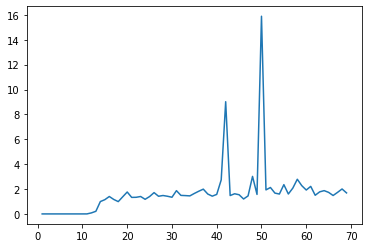

In [2]:
#матрица Гилберта
import numpy as np
import matplotlib.pyplot as plt
import copy


def inverse(A, n):
    new_A = np.eye(n)
    for i in range(0, n):
        if A[i][i] != 0:
            temp = A[i][i]
            for j in range(i, n):
                A[i][j] /= temp
            new_A[i] /= temp
            for I in range(i + 1, n):
                temp = A[I][i]
                for j in range(i, n):
                    A[I][j] -= A[i][j] * temp
                new_A[I] -= new_A[i] * temp
    for i in range(n - 1, -1, -1):
        for j in range(i + 1, n):
            new_A[i] -= A[i][j] * new_A[j]
            A[i][j] = 0
    return new_A


if __name__ == '__main__':
    n = 70
    result = []
    for I in range(1, n):
        hilbert_matrix = np.empty((I, I))
        for i in range(1, I + 1):
            for j in range(1, I + 1):
                hilbert_matrix[i - 1][j - 1] = 1 / (i + j - 1)
        inverse_matrix = inverse(copy.copy(hilbert_matrix), I)
        new_hilbert_matrix = inverse(copy.copy(inverse_matrix), I)
        result.append(np.linalg.norm(hilbert_matrix - new_hilbert_matrix))
    Myplot = plt.plot(range(1, n), result)
    plt.show()

Вывод: с увеличением размера матрицы искомая норма медленно возрастает, однако на отдельных зачениях присутствует
    резкий скачок.